<a href="https://colab.research.google.com/github/birajsth/MachineLearning-with-tensorflow/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text classification with movie reviews
We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database.

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
!pip install numpy==1.16.2
import numpy as np 

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument numwords=10000 keeps the top 10,000 most frequently occuring words in the training data.



In [4]:
print(f'Training entries: {len(train_data)}, labels: {len(train_labels)}')

Training entries: 25000, labels: 25000


The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary. Here's what the first review looks like:

In [0]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### Convert the integers back to words


In [5]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The First indices are reserveed
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])


1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decode_review(train_data[8])

"<START> just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and <UNK> lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens <UNK> <UNK> did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those <UNK> movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in <UNK> this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through so much more tense touching the void was also a great doc about mountain 

### Prepare the data
The reviews- the array of integers- must be converted to tensors before fed into the neural network.
we can pad the arrays so they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.


In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding="post",
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index["<PAD>"],
                                                      padding="post",
                                                      maxlen=256)


In [11]:
len(train_data[0]),len(train_data[1])
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [12]:
# input shape is the vocabulary count used for the movie reviews(10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:
  1. The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).
  2. Next, a GlobalAveragePooling1D layers returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
  3. This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
  4. The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.

### Loss function and optimizer
A model needs a loss function and an optimizer for training.Since this is a binary classification problem and the model outputs a probability(a single-unit layre with a sigmoid activation), we'll use the binary_crossentropy loss function.

Binary_crossentropy is better for dealing with probabilities-- it measures the distande between probability distributions, or in our case, between the ground-truth distribution and the predictions.

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

### Create a validation set

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


### Train the model


In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 2s 100us/sample - loss: 0.6917 - acc: 0.6061 - val_loss: 0.6893 - val_acc: 0.7085
Epoch 2/40
15000/15000 [==============================] - 1s 60us/sample - loss: 0.6852 - acc: 0.7383 - val_loss: 0.6806 - val_acc: 0.7355
Epoch 3/40
15000/15000 [==============================] - 1s 52us/sample - loss: 0.6713 - acc: 0.7539 - val_loss: 0.6629 - val_acc: 0.7552
Epoch 4/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6467 - acc: 0.7677 - val_loss: 0.6347 - val_acc: 0.7560
Epoch 5/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6107 - acc: 0.7934 - val_loss: 0.5974 - val_acc: 0.7844
Epoch 6/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.5660 - acc: 0.8143 - val_loss: 0.5547 - val_acc: 0.8064
Epoch 7/40
15000/15000 [==============================] - 1s 52us/s

### Evaluate the model
And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [18]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 38us/sample - loss: 0.3357 - acc: 0.8708
[0.33574424365997313, 0.87084]


### Create a graph of accuracy and loss over time
model.fit() returns a History object that contains a dictionary with everything that happened during training:

In [19]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

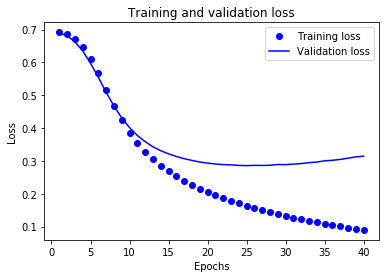

In [20]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1) 

# 'bo' is for 'blue dot'
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b' is for 'solid blue line'
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

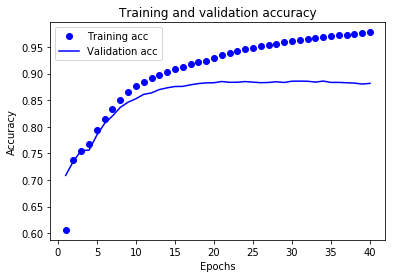

In [21]:
plt.clf() # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()